# Thailand case study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
from helper import *
from scipy.stats.mstats import gmean
#Importation of all the packages
from datetime import datetime
import math
import json
import zipfile  
import ssl
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics

#To dowload data
import requests
import io
import gzip

#To create the mapchart
import iso3166
import plotly
from iso3166 import countries
import plotly.graph_objects as go
import plotly.express as px


import matplotlib.gridspec as gridspec
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

## Download COVID-19 data

In [2]:
# Download covid data
deaths, cases, deaths_cumul, cases_cumul, deaths100k, deaths100k_cumul, cases100k, cases100k_cumul = get_cases_deaths_df(population_df, get_country_dict('original'), '2020-01-22', '2022-07-31')

NameError: name 'population_df' is not defined

In [ ]:
#getting dict of country name with countries language code
o_country_dict = get_country_dict('original')
inv_o_country_dict = {v: k for k, v in o_country_dict.items()}
other_country_name = {"Russia": "Russian Federation", "Turkey":"Türkiye", "Vietnam" : "Viet Nam", "South Korea" : "Korea, Democratic People's Republic of" }

In [ ]:
deaths = deaths.rename(columns = inv_o_country_dict)
cases = cases.rename(columns = inv_o_country_dict)

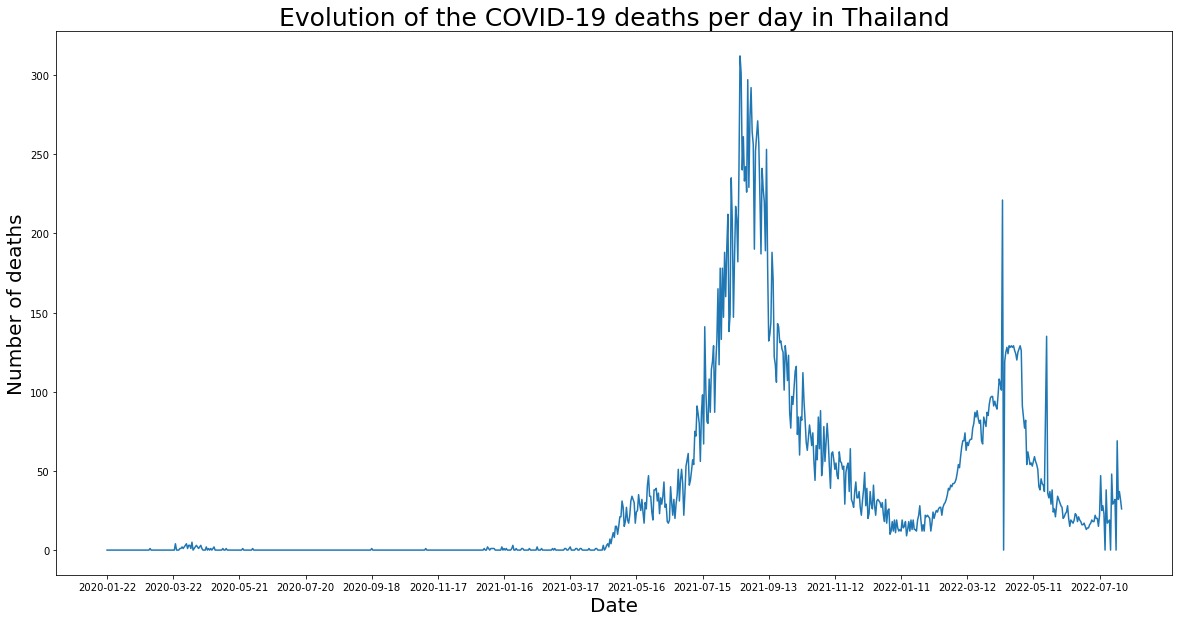

In [ ]:
#Plot the evolution of the number of deaths per day in Italy
plt.figure(figsize=(20, 10))
plt.plot(deaths['Thailand'])
plt.xlabel("Date",fontsize=20)
plt.ylabel("Number of deaths",fontsize=20)
plt.xticks(deaths.index[::60])
plt.title("Evolution of the COVID-19 deaths per day in Thailand",fontsize=25)
plt.show()

In [ ]:
#Seasonalthy decomposthion of time series
def seasonal_decomp(df, freq, tthle, fig, inner):
    result = seasonal_decompose(df,model='addthive', period=freq)
    results_df = pd.DataFrame({'trend': result.trend, 'seasonal': result.seasonal, 'resid': result.resid, 'observed': result.observed})
    results_df['date'] = results_df.index
    results_df['date'] = pd.to_datetime(results_df['date'])
    
    half_year_locator = mdates.MonthLocator(interval=3)
    month_year_formatter = mdates.DateFormatter('%b, %Y') 
    monthly_locator = mdates.MonthLocator()

    ax0 = plt.Subplot(fig, inner[0])
    ax0.plot(results_df['date'],results_df['trend'], 'b')
    ax0.set_title(tthle)
    ax0.set_xlabel('Trend')
    ax0.set_ylabel('Value')
    ax0.xaxis.set_major_locator(half_year_locator)
    ax0.xaxis.set_minor_locator(monthly_locator)
    ax0.xaxis.set_major_formatter(month_year_formatter)
    fig.add_subplot(ax0)

    ax1 = plt.Subplot(fig, inner[1])
    ax1.plot(results_df['date'], results_df['seasonal'], 'm')
    ax1.set_xlabel('Seasonal')
    ax1.set_ylabel('Value')
    ax1.xaxis.set_major_locator(half_year_locator)
    ax1.xaxis.set_minor_locator(monthly_locator)
    ax1.xaxis.set_major_formatter(month_year_formatter)
    fig.add_subplot(ax1)

    ax2 = plt.Subplot(fig, inner[2])
    ax2.plot(results_df['date'], results_df['resid'], 'k')
    ax2.set_xlabel('Residual')
    ax2.set_ylabel('Value')
    ax2.xaxis.set_major_locator(half_year_locator)
    ax2.xaxis.set_minor_locator(monthly_locator)
    ax2.xaxis.set_major_formatter(month_year_formatter)
    fig.add_subplot(ax2)

    ax3 = plt.Subplot(fig, inner[3])
    ax3.plot(results_df['date'], results_df['observed'], 'y')
    ax3.set_xlabel('Observed')
    ax3.set_ylabel('Value')
    ax3.xaxis.set_major_locator(half_year_locator)
    ax3.xaxis.set_minor_locator(monthly_locator)
    ax3.xaxis.set_major_formatter(month_year_formatter)
    fig.add_subplot(ax3)

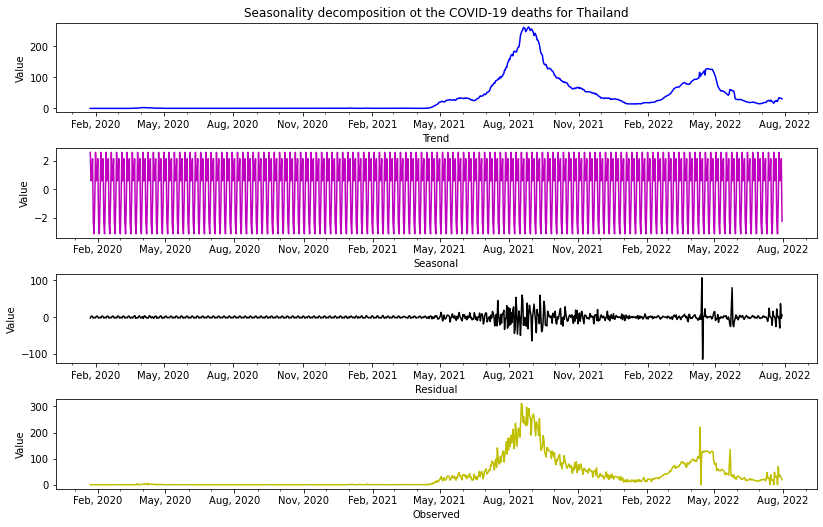

In [ ]:
#Seasonality decomposition for pageviews time serie
fig = plt.figure(figsize=(30, 60)) 
outer = gridspec.GridSpec(6, 2, wspace=0.2, hspace=0.2)
inner = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=outer[0], wspace=0.2, hspace=0.4)
seasonal_decomp(deaths['Thailand'], 7,'Seasonality decomposition ot the COVID-19 deaths for Thailand',fig,inner) 

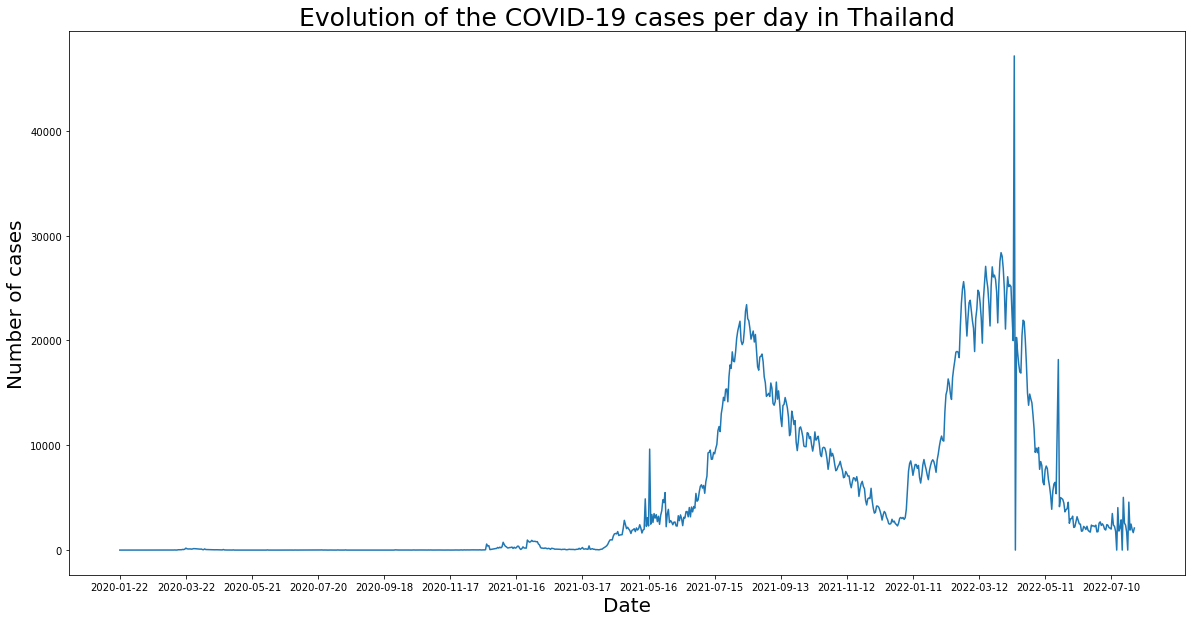

In [ ]:
#Plot the evolution of the number of cases per day in Italy
plt.figure(figsize=(20, 10))
plt.plot(cases['Thailand'])
plt.xlabel("Date",fontsize=20)
plt.ylabel("Number of cases",fontsize=20)
plt.xticks(deaths.index[::60])
plt.title("Evolution of the COVID-19 cases per day in Thailand",fontsize=25)
plt.show()

## Download wikipedia COVID-19 related pageviews

In [ ]:
#Loading raw df from csv file
pageview_df = pd.read_csv("page_views_covid_related.csv.gz")
population_df = pd.read_csv("Population_countries.csv")
#get cleaned dfs, cumulative df and per 100k of population dfs for pageviews, covid cases and deaths data 
df_pageviews, df_pageviews_cumul, df_pageviews100k, df_pageviews_cumul100k = get_pageviews_df(pageview_df, population_df, get_country_dict('original'), '2020-01-22', '2022-07-31')
deaths, cases, deaths_cumul, cases_cumul, deaths100k, deaths100k_cumul, cases100k, cases100k_cumul = get_cases_deaths_df(population_df, get_country_dict('original'), '2020-01-22', '2022-07-31')

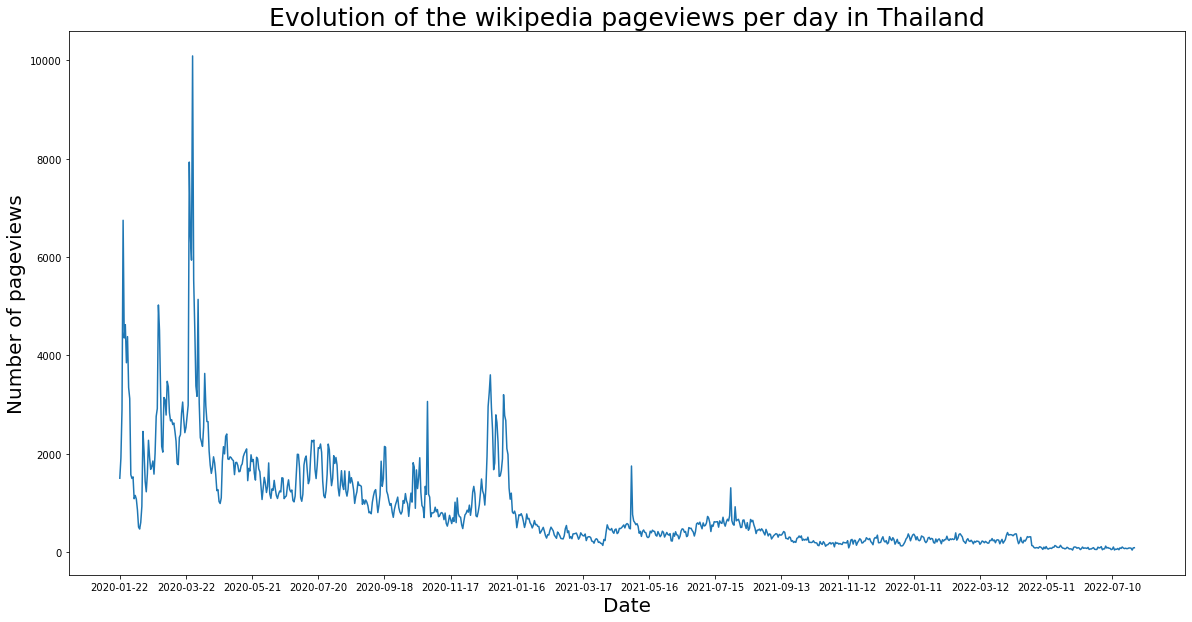

In [ ]:
#Plot the evolution of the number of wikipedia covid-19 related pageviews per day in Italy
plt.figure(figsize=(20, 10))
plt.plot(df_pageviews['th'])
plt.xlabel("Date",fontsize=20)
plt.ylabel("Number of pageviews",fontsize=20)
plt.xticks(deaths.index[::60])
plt.title("Evolution of the wikipedia pageviews per day in Thailand",fontsize=25)
plt.show()

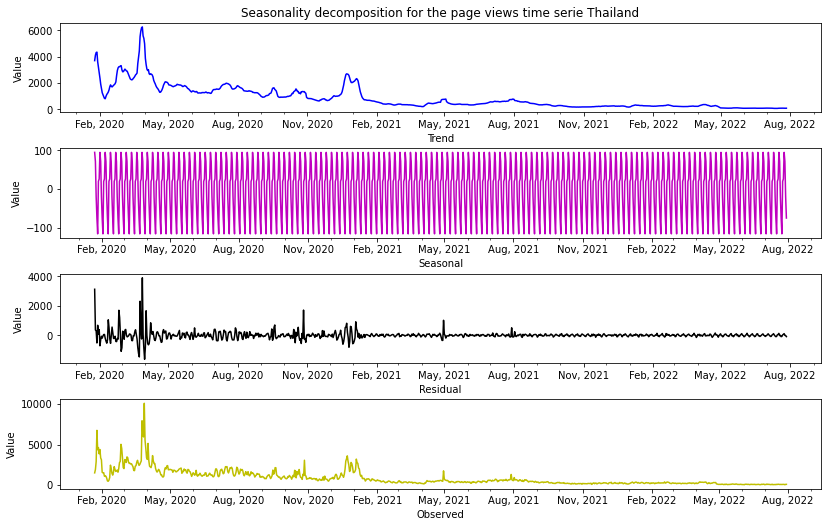

In [ ]:
#Seasonality decomposition for pageviews time serie
fig = plt.figure(figsize=(30, 60)) 
outer = gridspec.GridSpec(6, 2, wspace=0.2, hspace=0.2)
inner = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=outer[0], wspace=0.2, hspace=0.4)
seasonal_decomp(df_pageviews['th'], 7,'Seasonality decomposition for the page views time serie Thailand',fig,inner) 

## Rolling correlation

,correlation,country
date,,
2020-04-30,1090.809859,Thailand
2020-05-01,1090.809859,Thailand
2020-05-02,1090.809859,Thailand
2020-05-03,1090.809859,Thailand
2020-05-04,1090.809859,Thailand
...,...,...
2022-07-26,1.791851,Thailand
2022-07-27,1.765432,Thailand
2022-07-28,1.769801,Thailand


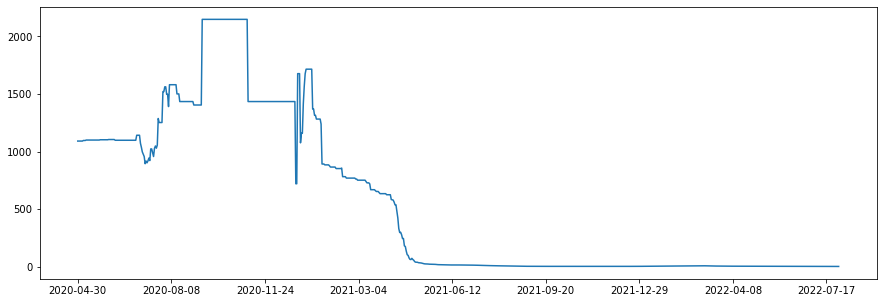

In [ ]:
x = deaths['Thailand']
y = df_pageviews['th']
model = RollingOLS(y,x, 100)
test = model.fit()
df = pd.DataFrame(test.params)

df = df.rename(columns = {'Thailand' : 'correlation'})
df['country'] = 'Thailand'

df = df.dropna(axis=0)
display(df)
    
plt.figure(figsize=(15, 5))   
plt.plot(df.index, df['correlation'])
plt.xticks(df.index[::100])
plt.show()

## Download the mobility data

In [ ]:
data_folder = 'data_2/'

#Download mobility and intervention files
google_mobility = pd.read_csv(data_folder+'Global_Mobility_Report.csv.zip')

<ipython-input-17-27d523c17c2c>:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  google_mobility = pd.read_csv(data_folder+'Global_Mobility_Report.csv.zip')


In [ ]:
#Change name of the columns
categories = ["Retail and Recreations", "Grocery and Pharmacy", "Parks","Transit stations", "Workplace", "Residential"]
google_mobility = google_mobility.rename(dict(zip(google_mobility.columns[8:],categories)), axis = 1)

#Transform date string to datetime
google_mobility['date'] = pd.to_datetime(google_mobility['date'])

#Delete columns about region
google_mobility = google_mobility.drop(google_mobility.iloc[:,2:7], axis = 1)

#Keep date from the 22nd January 2020 to the 31st July 2020
google_mobility = google_mobility.loc[(google_mobility['date'] < "2020-08-01") & (google_mobility['date'] >= "2020-01-22")]

#Regroup all data per country and per date and take the average
mobility = google_mobility.groupby(["country_region_code","country_region","date"]).mean()

#Keep only the country from our analysis
mobility = mobility[mobility.index.get_level_values('country_region').isin(list(get_country_dict('original').keys()))]

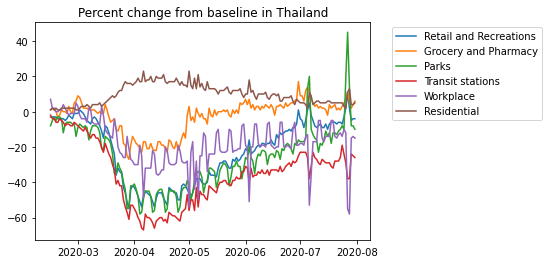

In [ ]:
#Plot the mobility values for each category for Italy
for cat in categories:
        data = mobility[mobility.index.get_level_values('country_region')=='Thailand']
        plt.plot(data.index.get_level_values('date'),data[cat], label = cat)
plt.title("Percent change from baseline in Thailand")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [ ]:
# Dowload and preprocess trust dataset
data_folder = 'data_2/'
df_trust_gov = pd.read_csv(data_folder+'share-who-trust-government.csv.zip') 
df_trust_gov = df_trust_gov.set_index("Entity")[["Trust the national government in this country"]].transpose()[COUNTRY_OWN_LANG_TRUST_GOV.keys()].rename(columns= COUNTRY_OWN_LANG_TRUST_GOV)
country_dict = get_country_dict('trust gov mobility')

In [ ]:
df_trust_gov['th']

Trust the national government in this country    55.6
Name: th, dtype: float64

In [ ]:
pearson_deaths = pd.DataFrame({"Pearson correlation":["Correlation coefficient:","P-value:"]})

for country in get_country_dict('original').items():
    corr, p_value = stats.pearsonr(df_pageviews[country[1]], deaths[country[0]])
    output_df = pd.DataFrame({str(country[0]):[corr, p_value] })
    pearson_deaths = pd.concat([pearson_deaths, output_df], axis=1)
print("{:.4f}".format(pearson_deaths['Thailand'][0]))

-0.3209


In [ ]:
pearson_cases = pd.DataFrame({"Pearson correlation":["Correlation coefficient:","P-value:"]})

for country in get_country_dict('original').items():
    corr, p_value = stats.pearsonr(df_pageviews[country[1]], cases[country[0]])
    output_df = pd.DataFrame({str(country[0]):[corr, p_value] })
    pearson_cases = pd.concat([pearson_cases, output_df], axis=1)
print("{:.4f}".format(pearson_cases['Thailand'][0]))

-0.3813


### THAILAND INFORMATIONS

First case : 2020-01-13
First death : 2020-03-01
Lockdown : 2020-03-21 --> only bangkok


##### Trust = 55.6
##### Correlation with deaths = -0.3209
##### Correlation with cases = -0.3813

#### PIB/hab = 21,114 dollars
#### Population estimated in 2022 = 69,648,117
#### Government = Constitutional monarchy